# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, classification_report

# Exploratory Data Analysis¶

In [2]:
raw_data = pd.read_excel('Dataset 1 Patient 7.xlsx')
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
154229,0.0024,0.0024,0.0024,0.0024,0.0024,0.0635,0.1270,0.0928,0.0464,0.2563,4,4,7,7
428558,0.0977,0.0024,0.0024,0.0024,0.0024,0.0708,0.4590,0.0757,0.0024,0.2026,0,0,0,0
120523,0.0146,0.0024,0.0024,0.0024,0.0024,0.0098,0.0488,0.0732,0.0024,0.1685,4,0,3,0
332418,0.0073,0.0269,0.0024,0.0024,0.0171,0.1172,0.3052,0.4321,0.0171,0.4346,0,0,0,0
355226,0.0220,0.6470,0.4346,0.0977,0.0732,0.2173,0.8716,0.1831,0.4785,0.4175,10,10,12,12


In [3]:
raw_data.shape

(465343, 14)

In [4]:
raw_data.columns

Index(['Emg1', 'Emg2', 'Emg3', 'Emg4', 'Emg5', 'Emg6', 'Emg7', 'Emg8', 'Emg9',
       'Emg10', 'repetition', 'rerepetition', 'stimulus', 'restimulus'],
      dtype='object')

In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 465343 entries, 0 to 465342
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          465343 non-null  float64
 1   Emg2          465343 non-null  float64
 2   Emg3          465343 non-null  float64
 3   Emg4          465343 non-null  float64
 4   Emg5          465343 non-null  float64
 5   Emg6          465343 non-null  float64
 6   Emg7          465343 non-null  float64
 7   Emg8          465343 non-null  float64
 8   Emg9          465343 non-null  float64
 9   Emg10         465343 non-null  float64
 10  repetition    465343 non-null  int64  
 11  rerepetition  465343 non-null  int64  
 12  stimulus      465343 non-null  int64  
 13  restimulus    465343 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 49.7 MB


In [6]:
raw_data.describe(include='all')

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
count,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000,465343.000000
mean,0.016418,0.174769,0.072729,0.029455,0.045257,0.323000,0.492774,0.348617,0.112679,0.320979,3.170298,2.318877,5.616943,4.164977
std,0.077547,0.405425,0.272274,0.071421,0.087363,0.445777,0.521808,0.422231,0.280829,0.225615,3.484652,3.300599,6.579710,6.287999
min,0.000000,0.000000,0.002400,0.000000,0.002400,0.002400,0.002400,0.002400,0.000000,0.002400,0.000000,0.000000,0.000000,0.000000
25%,0.002400,0.002400,0.002400,0.002400,0.002400,0.063500,0.185500,0.105000,0.002400,0.183100,0.000000,0.000000,0.000000,0.000000
50%,0.002400,0.002400,0.002400,0.002400,0.012200,0.188000,0.346700,0.212400,0.004900,0.244100,2.000000,0.000000,3.000000,0.000000
75%,0.007300,0.163600,0.012200,0.019500,0.051300,0.388200,0.603000,0.429700,0.075700,0.412600,6.000000,5.000000,10.000000,8.000000
max,2.321800,4.665500,4.660600,1.892100,2.136200,4.665500,4.663100,4.665500,4.660600,3.398400,10.000000,10.000000,23.000000,23.000000


In [7]:
print("Unique Dependent values and their counts :")
print(raw_data["stimulus"].value_counts())

Unique Dependent values and their counts :
0     197148
4      15514
8      15513
2      15507
12     15503
7      15490
6      15486
9      15483
5      15470
11     15462
3      15455
1      15433
10     15427
13     10339
17     10337
14     10336
15     10304
16     10259
21      5166
18      5165
19      5160
20      5130
23      5130
22      5126
Name: stimulus, dtype: int64


Text(0, 0.5, 'Frequency')

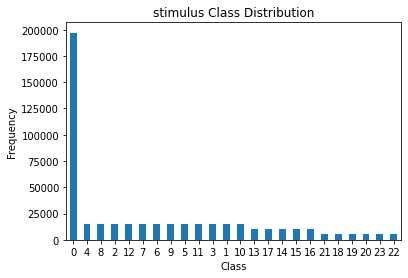

In [8]:
count_classes = pd.value_counts(raw_data['stimulus'], sort = True)

count_classes.plot(kind = 'bar', rot=0)

plt.title("stimulus Class Distribution")

plt.xlabel("Class")

plt.ylabel("Frequency")

# Data Cleaning and Exploratory Data Analysis with New Data

In [9]:
index_names = raw_data[ (raw_data['stimulus'] != raw_data['restimulus'])].index
raw_data.drop(index_names, inplace = True)

In [10]:
index_names = raw_data[ (raw_data['repetition'] != raw_data['rerepetition'])].index
raw_data.drop(index_names, inplace = True)

In [11]:
raw_data.sample(5)

,Emg1,Emg2,Emg3,Emg4,Emg5,Emg6,Emg7,Emg8,Emg9,Emg10,repetition,rerepetition,stimulus,restimulus
365027,0.0269,0.0024,0.0024,0.0024,0.0049,0.0024,0.0464,0.0708,0.0024,0.1489,0,0,0,0
239350,0.0024,0.2051,0.0024,0.0024,0.0464,0.4224,0.7227,0.5859,0.1563,0.4150,5,5,17,17
391554,0.0854,0.1465,0.3101,0.0562,0.0024,0.0024,0.3369,0.1465,0.3711,0.1221,10,10,16,16
201871,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.2808,0.0439,0.0024,0.5151,0,0,0,0
254918,0.0049,2.2925,0.3345,0.1563,0.4150,2.8931,0.4736,1.5894,3.1934,0.2368,2,2,2,2


In [12]:
raw_data.shape

(387008, 14)

In [13]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 387008 entries, 0 to 465342
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Emg1          387008 non-null  float64
 1   Emg2          387008 non-null  float64
 2   Emg3          387008 non-null  float64
 3   Emg4          387008 non-null  float64
 4   Emg5          387008 non-null  float64
 5   Emg6          387008 non-null  float64
 6   Emg7          387008 non-null  float64
 7   Emg8          387008 non-null  float64
 8   Emg9          387008 non-null  float64
 9   Emg10         387008 non-null  float64
 10  repetition    387008 non-null  int64  
 11  rerepetition  387008 non-null  int64  
 12  stimulus      387008 non-null  int64  
 13  restimulus    387008 non-null  int64  
dtypes: float64(10), int64(4)
memory usage: 44.3 MB


In [14]:
print(raw_data.isnull().any())

Emg1            False
Emg2            False
Emg3            False
Emg4            False
Emg5            False
Emg6            False
Emg7            False
Emg8            False
Emg9            False
Emg10           False
repetition      False
rerepetition    False
stimulus        False
restimulus      False
dtype: bool


In [15]:
X = raw_data.iloc[:,0:10]
y = raw_data.stimulus

In [16]:
# Splitting data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 39)

# Machine Learning Models

# Decision Tree

In [17]:
from sklearn import tree
tree = tree.DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [18]:
y_pred1 = tree.predict(X_test)

In [19]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred1)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred1)* 100}")

Accuracy is: 88.32588305211752


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     39037
           1       0.80      0.80      0.80      2203
           2       0.75      0.75      0.75      2428
           3       0.78      0.79      0.79      2206
           4       0.81      0.82      0.82      2160
           5       0.86      0.86      0.86      1972
           6       0.85      0.86      0.86      2193
           7       0.84      0.84      0.84      2070
           8       0.80      0.79      0.80      2293
           9       0.77      0.80      0.79      1921
          10       0.74      0.72      0.73      2093
          11       0.81      0.82      0.82      2006
          12       0.81      0.79      0.80      2165
          13       0.86      0.86      0.86      1405
          14       0.84      0.87      0.85      1393
          15       0.76      0.75      0.75      1663
          16       0.87      0.84      0.86      1693
 

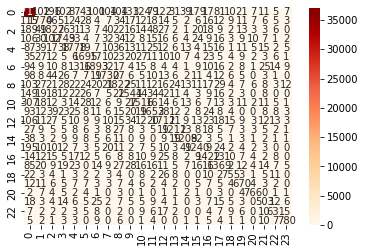

In [20]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred1))

cm = confusion_matrix(y_pred1, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Decision Tree

In [21]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))

MAE: 0.8575489005452056
MSE: 9.308260768455595
RMSE: 3.050944242108596


In [22]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred1, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred1,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred1,average='weighted'))

Precision Score :  0.8833626299746024
Recall Score :  0.8832588305211752
f1_score :  0.8832671380523972


# KNeighborsClassifier

In [23]:
from sklearn.neighbors import KNeighborsClassifier
KNeighborsClassifier = KNeighborsClassifier()
KNeighborsClassifier.fit(X_train, y_train)

KNeighborsClassifier()

In [24]:
y_pred2 = KNeighborsClassifier.predict(X_test)

In [25]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred2)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred2)* 100}")

Accuracy is: 91.62941526058758


Classification report : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     39037
           1       0.87      0.88      0.88      2203
           2       0.84      0.81      0.83      2428
           3       0.87      0.82      0.85      2206
           4       0.92      0.85      0.88      2160
           5       0.89      0.90      0.90      1972
           6       0.92      0.90      0.91      2193
           7       0.90      0.86      0.88      2070
           8       0.88      0.87      0.87      2293
           9       0.85      0.86      0.85      1921
          10       0.83      0.76      0.79      2093
          11       0.90      0.87      0.88      2006
          12       0.91      0.85      0.88      2165
          13       0.94      0.89      0.91      1405
          14       0.85      0.88      0.87      1393
          15       0.82      0.74      0.78      1663
          16       0.94      0.86      0.90      1693
 

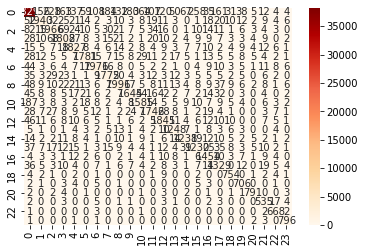

In [26]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred2))

cm = confusion_matrix(y_pred2, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- KNeighborsClassifier

In [27]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

MAE: 0.6251388853001214
MSE: 6.873737112736105
RMSE: 2.621781286212888


In [28]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred2, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred2,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred2,average='weighted'))

Precision Score :  0.915508116233735
Recall Score :  0.9162941526058758
f1_score :  0.9151372134339206


# Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
RandomForestClassifier = RandomForestClassifier()
RandomForestClassifier.fit(X_train, y_train)

RandomForestClassifier()

In [30]:
y_pred3 = RandomForestClassifier.predict(X_test)

In [31]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred3)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred3)* 100}")

Accuracy is: 95.42518281181364


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     39037
           1       0.95      0.92      0.94      2203
           2       0.93      0.87      0.90      2428
           3       0.96      0.90      0.93      2206
           4       0.98      0.91      0.95      2160
           5       0.98      0.95      0.96      1972
           6       0.97      0.94      0.96      2193
           7       0.96      0.91      0.94      2070
           8       0.96      0.93      0.94      2293
           9       0.94      0.90      0.92      1921
          10       0.92      0.80      0.86      2093
          11       0.96      0.92      0.94      2006
          12       0.97      0.91      0.94      2165
          13       0.99      0.94      0.96      1405
          14       0.95      0.95      0.95      1393
          15       0.95      0.84      0.89      1663
          16       0.98      0.96      0.97      1693
 

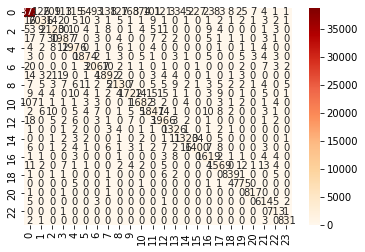

In [32]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred3))

cm = confusion_matrix(y_pred3, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- Random Forest

In [33]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

MAE: 0.3511020387070102
MSE: 3.829746001395313
RMSE: 1.9569736843900873


In [34]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred3, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred3,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred3,average='weighted'))

Precision Score :  0.9545127419822701
Recall Score :  0.9542518281181365
f1_score :  0.9536951944887471


# XGBoost

In [35]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
E:\MachineLearning\envs\gpu\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIn

[13:51:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=12,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [36]:
y_pred4 = xgb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred4)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred4)* 100}")

Accuracy is: 90.45115113304566


Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     39037
           1       0.85      0.81      0.83      2203
           2       0.81      0.75      0.78      2428
           3       0.84      0.79      0.81      2206
           4       0.92      0.82      0.87      2160
           5       0.89      0.85      0.87      1972
           6       0.91      0.85      0.88      2193
           7       0.87      0.85      0.86      2070
           8       0.84      0.80      0.82      2293
           9       0.83      0.79      0.81      1921
          10       0.83      0.68      0.75      2093
          11       0.86      0.83      0.85      2006
          12       0.88      0.78      0.83      2165
          13       0.92      0.88      0.90      1405
          14       0.89      0.90      0.89      1393
          15       0.86      0.79      0.82      1663
          16       0.93      0.87      0.90      1693
 

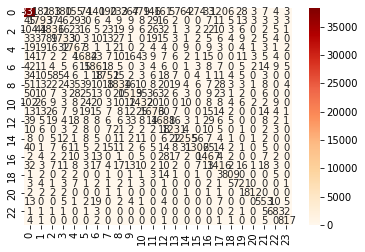

In [38]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred4))

cm = confusion_matrix(y_pred4, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- XGBoost

In [39]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred4))
print('MSE:', metrics.mean_squared_error(y_test, y_pred4))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred4)))

MAE: 0.6711971266892328
MSE: 6.990904627787396
RMSE: 2.644031888572336


In [40]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred4, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred4,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred4,average='weighted'))

Precision Score :  0.9028899176190484
Recall Score :  0.9045115113304566
f1_score :  0.9026254683674996


# ExtraTreesClassifier

In [41]:
from sklearn.ensemble import ExtraTreesClassifier
extratree = ExtraTreesClassifier()
extratree.fit(X_train, y_train)

ExtraTreesClassifier()

In [42]:
y_pred5 = extratree.predict(X_test)

In [43]:
from sklearn.metrics import accuracy_score
accuracy = {accuracy_score(y_test, y_pred5)}
print(f"Accuracy is: {accuracy_score(y_test, y_pred5)* 100}")

Accuracy is: 95.94713314901423


Classification report : 
               precision    recall  f1-score   support

           0       0.95      0.99      0.97     39037
           1       0.96      0.93      0.95      2203
           2       0.95      0.89      0.92      2428
           3       0.98      0.91      0.94      2206
           4       0.98      0.92      0.95      2160
           5       0.99      0.95      0.97      1972
           6       0.98      0.94      0.96      2193
           7       0.97      0.93      0.95      2070
           8       0.98      0.94      0.96      2293
           9       0.96      0.91      0.93      1921
          10       0.93      0.81      0.86      2093
          11       0.97      0.93      0.95      2006
          12       0.98      0.92      0.95      2165
          13       0.99      0.97      0.98      1405
          14       0.97      0.95      0.96      1393
          15       0.96      0.85      0.90      1663
          16       0.99      0.97      0.98      1693
 

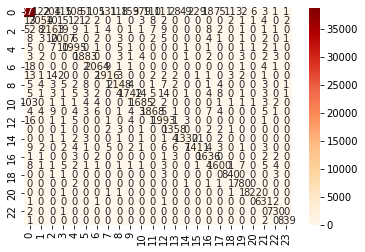

In [44]:
print('\033[1m' +'Classification report : '+ '\033[0m\n', classification_report(y_test, y_pred5))

cm = confusion_matrix(y_pred5, y_test)
print('\033[1m' +'Confusion Matrix : '+ '\033[0m')
sns.heatmap(cm, cmap = 'OrRd',annot = True, fmt='d')
plt.show()

# Evaluation -- ExtraTreesClassifier

In [45]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test,y_pred5))
print('MSE:', metrics.mean_squared_error(y_test, y_pred5))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred5)))

MAE: 0.32266608097981964
MSE: 3.552530942352911
RMSE: 1.884815890837328


In [46]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(y_test, y_pred5, average='weighted'))


from sklearn.metrics import recall_score
print("Recall Score : ",recall_score(y_test, y_pred5,average='weighted'))


from sklearn.metrics import f1_score
print("f1_score : ",f1_score(y_test, y_pred5,average='weighted'))

Precision Score :  0.9599462366915172
Recall Score :  0.9594713314901424
f1_score :  0.9590140791319528
